In [112]:
import pandas as pd

from plotnine import *

from tqdm import tqdm
from matplotlib import pyplot as plt

#import auxiliary functions for python
import sys

sys.path.append('../')
from AuthAttLib.utils import n_most_frequent_words, to_docTermCounts
from AuthAttLib.FreqTable import FreqTable
from tqdm import *
import logging
from AuthAttLib.text_processing import remove_parts_of_speach

In [113]:
# from google books:
most_freq_go = pd.read_csv("~/Data/google-books-common-words.txt", sep = '\t', header=None
                              ).iloc[:,0].str.lower().tolist()


In [114]:
import numpy as np
from TwoSampleHC import *
import pandas as pd
from matplotlib import pyplot as plt

def sample_from_prob(P, n) : 
    return np.random.multinomial(n, P, 1)

def sample_from_perb(P, n, ep, mu) : 
    k = int(len(P) * ep)
    idcs = np.random.choice(range(len(P)), size=k)
    Q = P.copy()
    Q[idcs] = Q[idcs] * (1 + mu)
    Q = Q / Q.sum()
    smp = np.random.multinomial(n, Q, 1)
    return smp

In [115]:
def power_law(N, xi) :
    P = np.arange(1,N+1) ** float(-xi)
    return P / P.sum()

In [140]:
p_type = .5

nMonte = 30000
N = 3000
n = N*10

P = power_law(N, p_type)

res = pd.DataFrame()

for p_type in [0, .5, 1, 2] :
    for i in range(nMonte) :
        X00 = sample_from_prob(P, n)
        X0 = sample_from_prob(P, n)
        X1 = sample_from_perb(P, n, 0.05, 1)

        pvals0 = two_sample_pvals(X00, X0, randomize=True)
        hc0 = HC(np.squeeze(pvals0))
        hc_org0 = hc0.HC()[0]
        hc_star0 = hc0.HCstar()[0]

        pvals1 = two_sample_pvals(X00, X1, randomize=True)
        hc1 = HC(np.squeeze(pvals1), )
        hc_org1 = hc1.HC()[0]
        hc_star1 = hc1.HCstar()[0]
        res = res.append({'itr' : i, 'HC0' : hc_org0, 'HCstar0' : hc_star0,
                          'HC1' : hc_org1, 'HCstar1' : hc_star1,
                          'n_feature' : N, 'n_sample' : n, 'Ptype' : p_type,
                          'diff0' : hc_org0 - hc_star0,
                          'diff1' : hc_org1 - hc_star1
                         }, ignore_index=True)


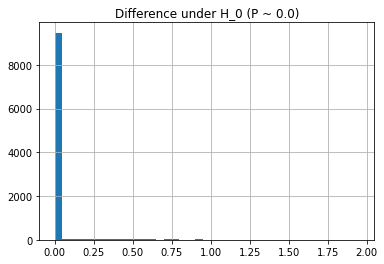

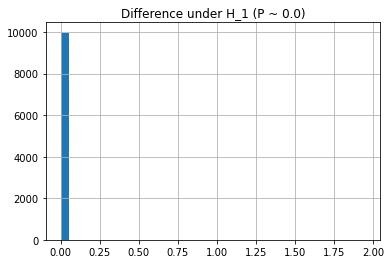

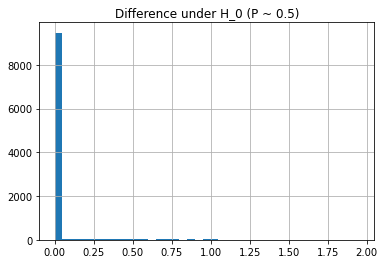

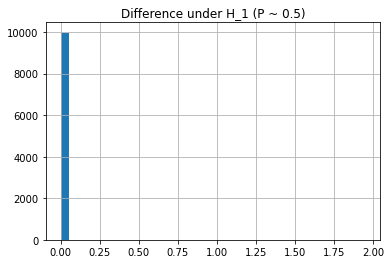

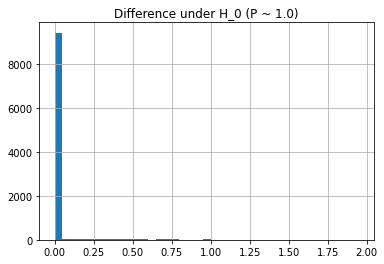

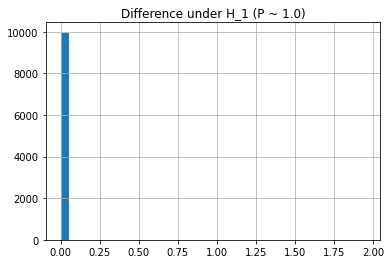

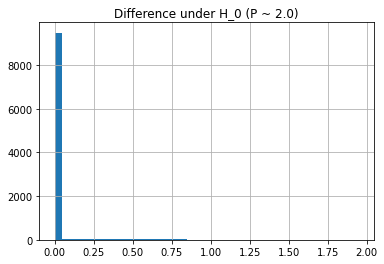

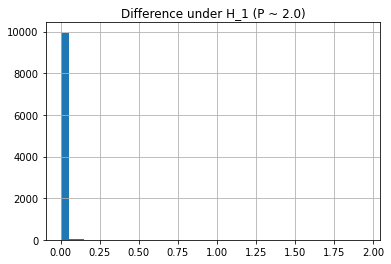

In [117]:
for p_type in res.Ptype.unique() :
    res.diff0[res.Ptype == p_type].hist(bins = np.arange(0, 2, .05))
    plt.title(f"Difference under H_0 (P ~ {p_type})")
    plt.show()

    res.diff1[res.Ptype == p_type].hist(bins = np.arange(0, 2, .05))
    plt.title(f"Difference under H_1 (P ~ {p_type})")
    plt.show()

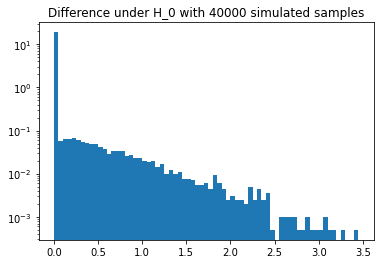

In [139]:
plt.hist(res.diff0,bins = np.arange(0, 3.5, .05), density=True)
plt.title(f"Difference under H_0 with {len(res)} simulated samples")
plt.semilogy()
#plt.ylim((0,200))
plt.show()

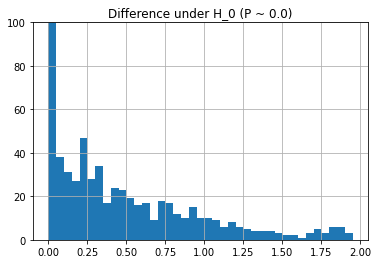

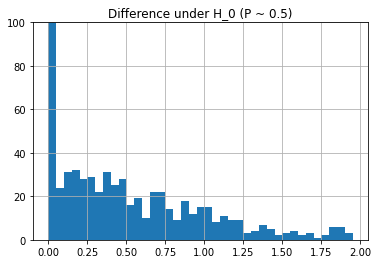

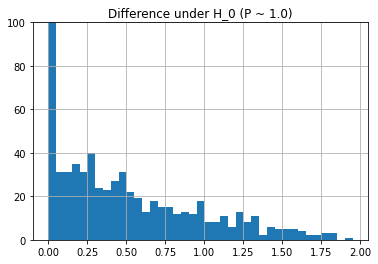

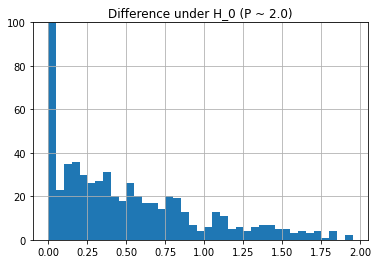

In [128]:
for p_type in res.Ptype.unique() :
    res.diff0[res.Ptype == p_type].hist(bins = np.arange(0, 2, .05))
    plt.title(f"Difference under H_0 (P ~ {p_type})")
    plt.ylim((0,100))
    plt.show()

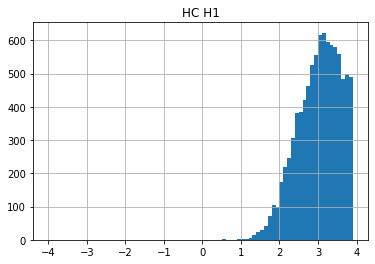

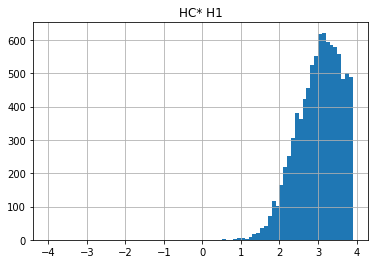

In [90]:
res.HC0.hist(bins = np.arange(-4,4, .1))
plt.title("HC null")
plt.show()

res.HCstar0.hist(bins = np.arange(-4,4, .1))
plt.title("HC* null")
plt.show()